In [1]:
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
## read into graph data
with open('Protein_graph_data.p', 'rb') as fid:
    data = pickle.load(fid)

In [3]:
## 0.1 - 0.5: attacker's budgets (larger budget means the attacker is more powerful)
data

defaultdict(list,
            {0.1: [{'original': <networkx.classes.graph.Graph at 0xa1a2184d0>,
               'attacked': <networkx.classes.graph.Graph at 0x108339650>}],
             0.2: [{'original': <networkx.classes.graph.Graph at 0x10836a9d0>,
               'attacked': <networkx.classes.graph.Graph at 0x108318910>}],
             0.3: [{'original': <networkx.classes.graph.Graph at 0xa199afc10>,
               'attacked': <networkx.classes.graph.Graph at 0x1083758d0>}],
             0.4: [{'original': <networkx.classes.graph.Graph at 0x1083751d0>,
               'attacked': <networkx.classes.graph.Graph at 0xa1a206a10>}],
             0.5: [{'original': <networkx.classes.graph.Graph at 0xa19c05950>,
               'attacked': <networkx.classes.graph.Graph at 0xa1a228c90>}]})

In [4]:
## suppoe budget=0.5
budget = 0.5

# original graph
G1 = data[budget][0]['original']

# attacked graph
G1_attacked = data[budget][0]['attacked']

# the adjacency matrix of G
print("Adj. matrix of G: \n")
Adj = nx.adjacency_matrix(G1).todense()
print(Adj)

print('=' * 50)

# the adjacency matrix of G_attacked
print("Adj. matrix of G_attacked: \n")
Adj_attacked = nx.adjacency_matrix(G1_attacked).todense()
print(Adj_attacked)

Adj. matrix of G: 

[[0.       0.57735  0.       ... 0.       0.       0.      ]
 [0.57735  0.       0.       ... 0.       0.       0.      ]
 [0.       0.       0.       ... 0.       0.       0.      ]
 ...
 [0.       0.       0.       ... 0.       0.408248 0.408248]
 [0.       0.       0.       ... 0.408248 0.       1.      ]
 [0.       0.       0.       ... 0.408248 1.       0.      ]]
Adj. matrix of G_attacked: 

[[0.         0.57696587 0.         ... 0.         0.         0.        ]
 [0.57696587 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.43785915 0.4378593 ]
 [0.         0.         0.         ... 0.43785915 0.         0.91735846]
 [0.         0.         0.         ... 0.4378593  0.91735846 0.        ]]


In [5]:
# visualization of the original graph
fig_original = plt.figure(figsize=(8, 6))
#nx.draw(G1)

<Figure size 576x432 with 0 Axes>

In [6]:
# visualization of modified graph
fig_modified = plt.figure(figsize=(8,6))
#nx.draw(G1_attacked)

<Figure size 576x432 with 0 Axes>

# Simple visualization - Modified vs Original edges
### Background: 
One motivating application scenario is to apply our model to biomedical research. 

Example: suppose there is a graph G=(V, E). The node set V contains virus proteins. The graph G is weighted, where the weight of an edge (i, j) is the cosine similarity between the gene expressions of protein i and protein j. Suppose there is a target set S of proteins that we are interested in, for example, those related to human immunodeficiency. We would like to have a drug that is effective specifically for the proteins in S. For those proteins not in S, although they are still virus proteins, we would like the drug to have minimal effect on them (to avoid side-effect, etc). In this scenario, we can apply our model to modify the weights of the original graph G (which corresponds to, for example, gene editing techniques), such that the effect of the drug is maximized within S, while the effect on the rest of the graph is minimized. 

### Input: 
* *Protein_graph_data.p* file contains the original graph G and the modified version (which is denoted by “attacked”, although we are not really attacking anything), across different budgets of the attacker.
* *target_nodes.txt* file contains the node IDs of the proteins relevant to human immunodeficiency (the target nodes).

### Output: 
Let G (resp. G’) be the original (resp. modified) graph under a certain budget. Some edges’ weights of G are increased, while others are decreased. 
* Generates a visualization to highlight these modifications; visualize G' graph with the edges colored based on if they increase or decreased, compared with G. Subgraph / target nodes are denoted with a different color

### Other Notes: 
* these graph data comes from a real-world virus protein dataset. (https://amp.pharm.mssm.edu/Harmonizome/dataset/Virus+MINT+Protein-Viral+Protein+Interactions)

In [7]:
def simpleColorNodes(G, targets, target_color='blue', other_color='black'):
    """
    maps a color to each of the specified nodes.
    Input: 
        targets = (target) nodes to color target_color
        target_color = for target nodes. Default blue
        other_color = for non-target nodes in G. Default black
    Outputs: 
        list of node colors (in the order given in G)
    """ 
    return [target_color if node in targets else other_color for node in G]

def simpleColorWeightsAttacked(G_orig, G_attack):
    """
    maps a color to each edge based on how weights changed between G_orig and G_attack
    Input: 
        G_orig = initial graph.
        G_attack = modified graph
    Output: edge_colors = list of edge colors (green decreased, red increased, grey unchanged)
    """
    edge_colors = []
    for (u,v,d) in G_attack.edges(data=True):
        if d['weight'] > G_orig[u][v]['weight']: #weight increased
            edge_colors.append('red')
        elif d['weight'] < G_orig[u][v]['weight']: #weight decreased
            edge_colors.append('green')
        else: #weight unchanged or None
            edge_colors.append('grey')
    return edge_colors

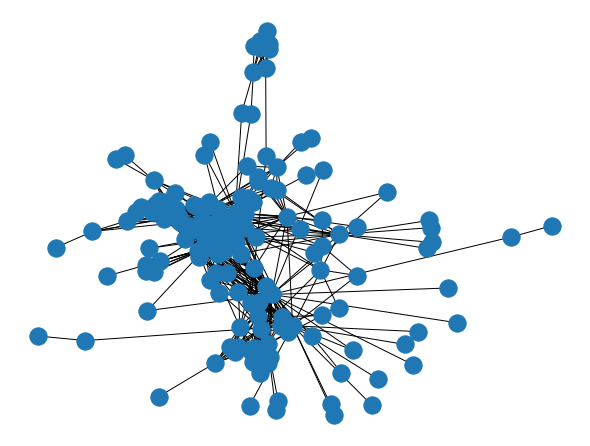

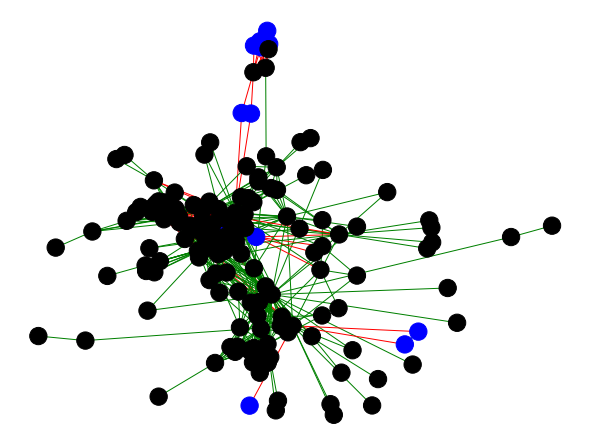

In [8]:
posNodes = nx.spring_layout(G1) # positions for all nodes
edgeColors = simpleColorWeightsAttacked(G1,G1_attacked) #modified edge colors
with open('target_nodes.txt', 'r') as f:
    target_nodes = f.read().split(', ')
targetNodes = [int(i) for i in target_nodes]
nodeColors = simpleColorNodes(G1,targets=targetNodes)


# visualization of the original graph
fig_original = plt.figure(figsize=(8,6))
nx.draw(G1, pos=posNodes)

# visualization of the modified graph
fig_modified = plt.figure(figsize=(8,6))
nx.draw(G1_attacked,pos=posNodes,node_color=nodeColors,edge_color=edgeColors)


# Graph with regions/groupings - Modified vs Original edges
## Visualization Project with Biomedical motivation

### Background:
* The anatomy of the brain generally is divided into sections. In a simple grouping of regions: default mode, visual, fronto-parietal, and central. 
* Suppose we want to have some drugs precisely targeted to the central region, while limiting the medical impact on the others

### Input:
We have a graph *G* quantifying the likelihood that the neurons in different regions co-activate. 
* **Python pickle file** with original and modified graphs (as with prior experiment(s))

Example: 
* G has 638 nodes. The first 200 nodes correspond to neurons in the default mode, the next 112 nodes to the visual region, then the next 145 nodes to the fronto-parietal region, and the last 181 nodes to the central region.
* target subgraph / set: some number (i.e. 100) of the nodes (within or across regions)
    * i.e. last 100 nodes (subset of the 181 central region nodes)

### Output: 
* Modified graph with visualized modifications:
    * edges: colored based on increase/decrease from original
    * regions nodes: nodes colored based on region belonging to
    * subgraph: nodes are outlined in black
    * node size: node size proportional to its weighted degree
        * Useful with networks significantly larger than simple small ones worked with previously
* Observations (measurements and plots):
    * Among the edges that were modified, what fraction are connecting to the the regions not including the target subgraph?
    * Generate plots to visualize these fractions

### Other Notes:
* this brain dataset is from "Meta-analysis network of human whole-brain functional coactivations with comparable resting-state fMRI network and node coordinates", at (https://sites.google.com/site/bctnet/datasets)
* Research paper behind this dataset is (https://www.pnas.org/content/pnas/110/28/11583.full.pdf) 

# TODO:
* Modification visualizations (coloring, outlines, size, etc):
    * outline subgraph nodes (vs simply coloring them)
    * coloring nodes - modify code to generalize for regions (not just one subgraph vs all other nodes), include clause to allow for previous nodes to remain setting they are if exists, otherwise overwrite with default black. 
    * make the size of each node proportional to its weighted degree
    * Measurements/Observations


In [12]:
## read into graph data
with open('Brain_numExp_1_attacked_graphs_equalAlpha.p', 'rb') as fid:
    data1 = pickle.load(fid)

# visualization of the original graph
fig_original = plt.figure(figsize=(8, 6))
#nx.draw(G)

## suppose budget=0.5 #TODO: run through each budget value to compare what happens with different budgets
budget = 0.5

# original graph
G = data[budget][0]['original']

# attacked graph
G_attacked = data[budget][0]['attacked']

# the adjacency matrix of G
print("Adj. matrix of G: \n")
Adj = nx.adjacency_matrix(G).todense()
print(Adj)

print('=' * 50)

# the adjacency matrix of G_attacked
print("Adj. matrix of G_attacked: \n")
Adj_attacked = nx.adjacency_matrix(G_attacked).todense()
print(Adj_attacked)

# visualization of the original graph
fig_original = plt.figure(figsize=(8,6))
#nx.draw(G)

# visualization of modified graph
fig_modified = plt.figure(figsize=(8,6))
#nx.draw(G_attacked)

Adj. matrix of G: 

[[0.       0.57735  0.       ... 0.       0.       0.      ]
 [0.57735  0.       0.       ... 0.       0.       0.      ]
 [0.       0.       0.       ... 0.       0.       0.      ]
 ...
 [0.       0.       0.       ... 0.       0.408248 0.408248]
 [0.       0.       0.       ... 0.408248 0.       1.      ]
 [0.       0.       0.       ... 0.408248 1.       0.      ]]
Adj. matrix of G_attacked: 

[[0.         0.57696587 0.         ... 0.         0.         0.        ]
 [0.57696587 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.43785915 0.4378593 ]
 [0.         0.         0.         ... 0.43785915 0.         0.91735846]
 [0.         0.         0.         ... 0.4378593  0.91735846 0.        ]]


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [13]:
print(G.number_of_nodes())

152


In [10]:
def colorNodes(G, targets, target_color='blue', other_color=False, ret_G=False):
    """
    maps a color to each of the specified nodes.
    Input: 
        targets = (target) nodes to color target_color
        target_color = for target nodes. Default blue
        other_color = if True, color all non-target nodes in G to 'black' color.
    Output: 
        ret_G is False => list of node colors (in the order given in G)
        ret_G is True => G graph with the color modifications, if ret_G == True
    """
    if other_color:
        nodeColors = [target_color if node in targets else 'black' for node in G]
    else:
        nodeColors = [target_color if node in targets else G.nodes[node]['node_color'] for node in G]
    
    #if ret_G:
    #    colors = {k: v for k, v in enumerate(nodeColors)}
    #    nx.set_node_attributes(G,'node_color', colors) #graph with modified attribute node_color values
    #    return G
    return nodeColors

def colorModifiedWeights(G_orig, G_attack, color_inc='red', color_dec='green', color_same='grey', ret_G=False):
    """
    maps a color to each edge based on how weights changed between G_orig and G_attack
    Input: 
        G_orig = initial graph.
        G_attack = modified graph
        color_inc, color_dec, color_same = colors denoting if the edge has increased, decreased, or stayed the same
    Output: 
        ret_G False => list of edge colors
        ret_G True => graph with the edge color modifications, if ret_G == True
    """
    edge_colors = []
    for (u,v,d) in G_attack.edges(data=True):
        if d['weight'] > G_orig[u][v]['weight']: #weight increased
            edge_colors.append(color_inc)
        elif d['weight'] < G_orig[u][v]['weight']: #weight decreased
            edge_colors.append(color_dec)
        else: #weight unchanged or None
            edge_colors.append(color_same)
    #if ret_G:
    #    colors = {k: v for k, v in enumerate(edge_colors)}
    #    nx.set_node_attributes(G,'edge_color', colors) #graph with modified attribute edge_color values
    #    return G
    return edge_colors

In [11]:
def targetTxtToList(filename='target_nodes.txt', delimiter=', '):
    """
    gets a list of node IDs from a txt file
    Input:
        filename = of txt file containing list of target nodes
        delimiter = character(s) that separate each node
    Output:
        list of node IDs
    """
    with open(filename, 'r') as f:
        target_nodes = f.read().split(delimiter)
    return [int(i) for i in target_nodes]

In [12]:
def outlineNodes(G, targets, color='r', width=1, ret_G=False):
    """
    maps an outline (color, line-width) for the specified 'targets' nodes in graph G
    Input: 
        targets = (target) nodes to outline
        color = outline color. Default red
        width = outline width. Default 1
    Output:
        list of node 
        (optional) figure with the outline modifications, if ret_G == True
    """
    lineWidths = [width] * G.number_of_nodes() #TODO: incorporate line widths
    outlineColors = [color if node in targets else G.nodes[node]['node_color'] for node in G] #NOTE: the key is node_color b/c assuming only subgraph nodes will ever be outlined

    #if ret_G:
    #    colors = {k: v for k, v in enumerate(outlineColors)}
    #    nx.set_node_attributes(G,'outline_color', colors) #graph with modified attribute node_color values
    #    return G
    return outlineColors, lineWidths

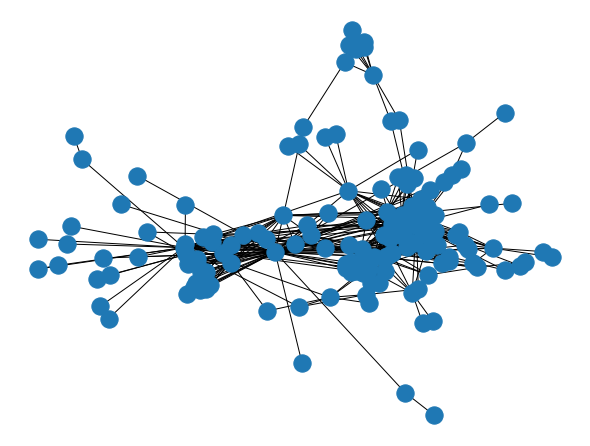

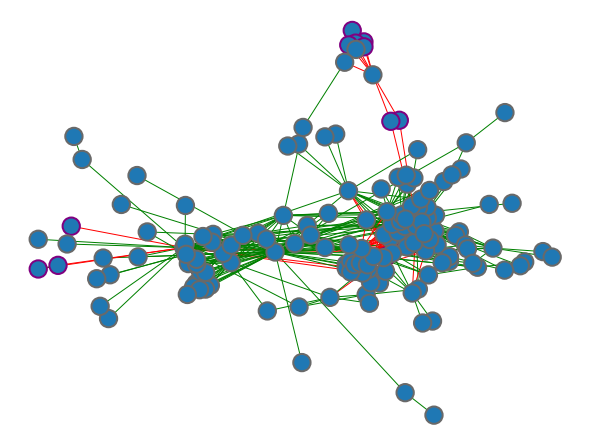

In [13]:
#NOTE: Ensure that G has node_color values for each of the nodes before running functions like colorNodes() on it
nx.set_node_attributes(G,name='node_color',values='dimgrey') #set them to dimgrey as default before re-coloring
posNodes = nx.spring_layout(G) # positions for all nodes .  #TODO: figure out better layout, so more visually showing of nodes and edges
targetNodes = targetTxtToList(filename='target_nodes.txt', delimiter=', ')

edgeColors = colorModifiedWeights(G,G_attacked) #modified edge colors
#G = colorModifiedWeights(G,G_attacked,ret_G=True)
outlineColors,outlineWidths = outlineNodes(G,targets=targetNodes,color='purple',width=2) #subgraph nodes outlined

#TODO: call colorNodes(G,targets= NODES FOR EACH REGION, COLOR OF CORRESPONDING REGION)
#nodeColors = colorNodes(G,targets=targetNodes)
#G = colorNodes(G,targets=targetNodes,ret_G=True)

# visualization of the original graph
fig_original = plt.figure(figsize=(8,6))
nx.draw(G, pos=posNodes)

# visualization of the modified graph
fig_modified = plt.figure(figsize=(8,6))
#nx.draw(G_attacked,pos=posNodes,node_color=nodeColors,edge_color=edgeColors)
nx.draw(G_attacked,pos=posNodes,edgecolors=outlineColors,linewidths=outlineWidths,edge_color=edgeColors)